<a href="https://colab.research.google.com/github/renatamontanhana/Machine_Learning_Algoritmo_Naive_Bayes_CDPRO/blob/main/M4A36_An%C3%A1lise_de_Dados_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://cienciadosdados.com/images/cdp.png)
> #   Análise Exploratória de Dados de Vendas do Marketing Place
 > #  <font color = blue> MERCADO LIVRE

![](https://certificadocursosonline.com/blog/wp-content/uploads/2020/05/como-comprar-no-mercado-livre.jpg)


--  Você é o Cientista de Dados do Mercado Livre. Seu **objetivo é realizar Análise Exploratória** dos dados deste E-commerce.

-- Para Isso, vc deve **responder algumas perguntas**,Poderosas, sobre o negócio em si.

-- **Os dados contêm centenas de milhares de compras** em lojas de eletrônicos divididas por mês, tipo de produto, custo, endereço de compra, etc. de 12 meses.

-- Vamos, inicialmente, analisar esses dados usando somente nosso querido **pandas e o matplotlib**, para análise gráfica dos dados.

In [ ]:
import pandas as pd

### Leia os dados ou importe os dados

In [ ]:
data=pd.read_csv('/content/Sales_data.csv')

### veja nossos dados

In [ ]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
23870,241937,AA Batteries (4-pack),1,3.84,08/06/19 17:30,"542 2nd St, Portland, OR 97035"
23871,241938,AAA Batteries (4-pack),1,2.99,08/22/19 19:15,"891 Forest St, Dallas, TX 75001"
23872,241939,AA Batteries (4-pack),1,3.84,08/09/19 12:03,"151 Spruce St, Seattle, WA 98101"
23873,241940,27in 4K Gaming Monitor,1,389.99,08/30/19 16:58,"978 Chestnut St, Boston, MA 02215"


#### Aqui vc Precisa conhecer as dimensões dos dados. Os domínios dos campos. Se existe valores ausentes ou duplicados. De boa?

In [ ]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN


### Verifique o tamanho dos nossos dados usando .shape
###### Mostra o número total de registros/linhas e colunas em nosso conjunto de dados

In [ ]:
data.shape

(23875, 6)

### A função  ".columns" nos mostra o nome das colunas

In [ ]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

### A função ".index" para verificar a indexação do nosso conjunto de dados

In [ ]:
data.index

RangeIndex(start=0, stop=23875, step=1)

### A função ".nunique()" no mostra o número total de valores únicos em cada coluna do dataframe.

In [ ]:
data.nunique()

Order ID            22809
Product                20
Quantity Ordered        9
Price Each             24
Order Date          18471
Purchase Address    22072
dtype: int64

### A função ".value_counts()" nos mostra quais são esses valores únicos

In [ ]:
data['Quantity Ordered'].value_counts()

1                   21503
2                    1741
3                     374
4                      96
Quantity Ordered       46
5                      30
6                      10
7                       5
8                       1
Name: Quantity Ordered, dtype: int64

### verifique o "tipo de dados" (numéricos ou textuais) de nossos dados
###### .info() fornece todas as informações sobre os dados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23875 entries, 0 to 23874
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          23806 non-null  object
 1   Product           23806 non-null  object
 2   Quantity Ordered  23806 non-null  object
 3   Price Each        23806 non-null  object
 4   Order Date        23806 non-null  object
 5   Purchase Address  23806 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [ ]:
# A função dtype mostra o type para uma variável específica
data['Price Each'].dtype

dtype('O')

### Verificar Existe algum valor ausente (missing values)

In [ ]:
data.isnull().sum()

Order ID            69
Product             69
Quantity Ordered    69
Price Each          69
Order Date          69
Purchase Address    69
dtype: int64

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
# Eliminar os valores missing.
## obs: Mais para frente, vc descobre que pode fazer um trabalho de substituição de valores missing, ao invés de simplesmente eliminá-lo
## O nome desse processamento se chama IMPUTAÇÃO.
data.dropna(inplace=True)

In [ ]:
data.shape

(23806, 6)

In [ ]:
data.duplicated().sum()

72

![](https://media.seudinheiro.com/uploads/2021/03/144154916_10159173164648506_4365628844580661971_o-628x353.png)

### O que é importante saber num business? Qual é o problema de negócio? Onde estão os números sensíveis do negócio. Onde entra o cash. Onde está o furo no tanque de combustível?

![](https://cienciadosdados.com/images/startse.png)

### Análise 1: Qual foi o melhor mês para vendas? Quanto foi ganho nesse mês?

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
data['Month']=data['Order Date'].str[0:2]
data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
23870,241937,AA Batteries (4-pack),1,3.84,08/06/19 17:30,"542 2nd St, Portland, OR 97035",08
23871,241938,AAA Batteries (4-pack),1,2.99,08/22/19 19:15,"891 Forest St, Dallas, TX 75001",08
23872,241939,AA Batteries (4-pack),1,3.84,08/09/19 12:03,"151 Spruce St, Seattle, WA 98101",08
23873,241940,27in 4K Gaming Monitor,1,389.99,08/30/19 16:58,"978 Chestnut St, Boston, MA 02215",08


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23806 entries, 0 to 23874
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          23806 non-null  object
 1   Product           23806 non-null  object
 2   Quantity Ordered  23806 non-null  object
 3   Price Each        23806 non-null  object
 4   Order Date        23806 non-null  object
 5   Purchase Address  23806 non-null  object
 6   Month             23806 non-null  object
dtypes: object(7)
memory usage: 1.5+ MB


In [ ]:
data['Month'].astype('int32')

In [ ]:
data=data[data['Order Date'].str[0:2] != 'Or']

In [ ]:
data['Month']=data['Order Date'].str[0:2]
data['Month'].astype('int32')

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [ ]:
look_up={'01':'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
           '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}


data['Month']= data['Month'].apply(lambda x: look_up[x])

<ipython-input-24-04cc0772c4f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']= data['Month'].apply(lambda x: look_up[x])


In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23760 entries, 0 to 23874
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          23760 non-null  object
 1   Product           23760 non-null  object
 2   Quantity Ordered  23760 non-null  object
 3   Price Each        23760 non-null  object
 4   Order Date        23760 non-null  object
 5   Purchase Address  23760 non-null  object
 6   Month             23760 non-null  object
dtypes: object(7)
memory usage: 1.5+ MB


In [ ]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [ ]:
# Vamos converter os valores objects em float (numéricos)

# Transformar a coluna Quantity Ordered
data['Quantity Ordered']= data['Quantity Ordered'].astype('float')

# Transformar a coluna Price Each
data['Price Each']=data['Price Each'].astype('float')

<ipython-input-28-def2c8a733a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity Ordered']= data['Quantity Ordered'].astype('float')
<ipython-input-28-def2c8a733a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Each']=data['Price Each'].astype('float')


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23760 entries, 0 to 23874
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          23760 non-null  object 
 1   Product           23760 non-null  object 
 2   Quantity Ordered  23760 non-null  float64
 3   Price Each        23760 non-null  float64
 4   Order Date        23760 non-null  object 
 5   Purchase Address  23760 non-null  object 
 6   Month             23760 non-null  object 
 7   Sales             23760 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.6+ MB


In [ ]:
highest_sales=data.groupby('Month').sum()

In [ ]:
highest_sales.head()

,Quantity Ordered,Price Each,Sales
Month,,,
Apr,20539.0,3362503.59,3385499.82
Aug,6172.0,988286.42,995570.31
May,29.0,10555.45,10559.29
Sep,4.0,547.93,547.93


In [ ]:
highest_sales.head(12)

,Quantity Ordered,Price Each,Sales
Month,,,
Apr,20539.0,3362503.59,3385499.82
Aug,6172.0,988286.42,995570.31
May,29.0,10555.45,10559.29
Sep,4.0,547.93,547.93


In [ ]:
import matplotlib.pyplot as plt

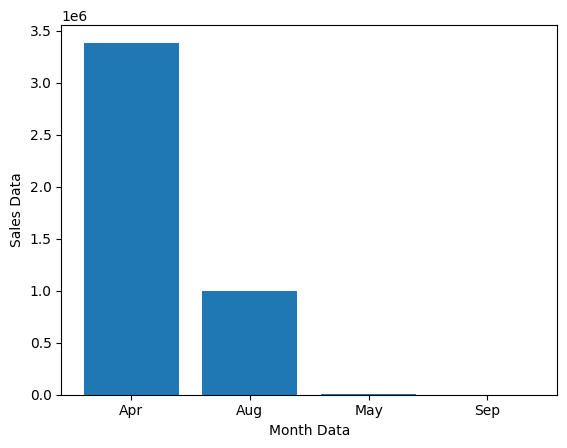

In [ ]:
plt.figure()
plt.bar(highest_sales.index,highest_sales['Sales'])
plt.xlabel('Month Data')
plt.ylabel('Sales Data')
plt.show()

### Análise 2: Qual cidade vendeu mais produto?

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99


In [ ]:
df='How,are,you'
df.split(',')

['How', 'are', 'you']

In [ ]:
data['City']=data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles


In [ ]:
city_sold=data.groupby('City').sum()

In [ ]:
city_sold.head(10)

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,2085.0,343857.14,345847.15
Austin,1431.0,226673.44,228205.95
Boston,2900.0,467957.08,471715.43
Dallas,2006.0,321277.63,322825.87
Los Angeles,4334.0,708482.99,712548.08
New York City,3558.0,579977.32,585559.71
Portland,1835.0,302569.05,304005.38
San Francisco,6475.0,1049506.25,1057933.81
Seattle,2120.0,361592.49,363535.97


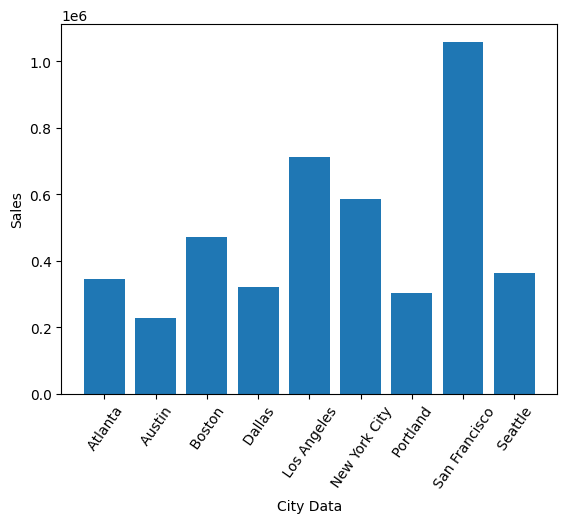

In [ ]:
#plt.show()
plt.bar(city_sold.index,city_sold['Sales'])
plt.xticks(rotation=55)
plt.xlabel('City Data')
plt.ylabel('Sales')
plt.show()

### Análise 3: A que horas devemos exibir anúncios para maximizar a probabilidade de o cliente comprar produtos?

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles


In [ ]:
data['Time']=data['Order Date'].str[9:11]

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [ ]:
time_data=data.groupby('Time').sum()
time_data

,Quantity Ordered,Price Each,Sales
Time,,,
00,578.0,95743.62,96712.52
01,343.0,59574.61,60051.16
02,189.0,28601.59,28710.46
03,121.0,26035.24,26202.26
04,122.0,23181.60,23263.27
05,227.0,27918.39,28059.83
06,391.0,57167.40,57989.70
07,588.0,96232.94,96931.66
08,925.0,146290.30,146967.71


In [ ]:
time_data.sort_values(by=['Sales'], ascending=False)

,Quantity Ordered,Price Each,Sales
Time,,,
19,1861.0,310691.86,312423.97
12,1732.0,301216.73,305273.43
20,1752.0,292583.22,294626.15
11,1758.0,285700.89,287134.94
18,1757.0,279539.98,280662.42
14,1633.0,269388.35,270698.72
13,1749.0,265246.13,266912.61
10,1634.0,255683.42,257566.12
21,1518.0,247345.76,250644.37


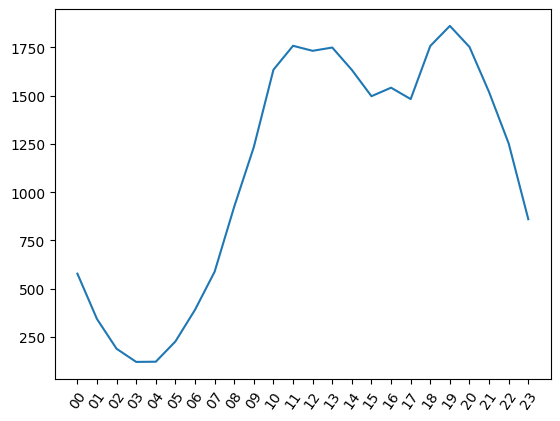

In [ ]:
plt.show()
#plt.plot(time_data.index,time_data['Sales'])
plt.plot(time_data.index,time_data['Quantity Ordered'])
plt.xticks(rotation=55)
plt.show()

### Análise 4: Quais são os produtos mais vendidos juntos?

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [ ]:
duplicated_data=data[data['Order ID'].duplicated(keep=False)]

In [ ]:
duplicated_data.head(6)

,Order ID,Product_bundle
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [ ]:
duplicated_data['Product_bundle']=duplicated_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [ ]:
duplicated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Product_bundle
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [ ]:
duplicated_data=duplicated_data[['Order ID','Product_bundle']].drop_duplicates()

In [ ]:
duplicated_data.head()

,Order ID,Product_bundle
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

In [ ]:
count=Counter()
for row in duplicated_data['Product_bundle']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,3)))
count.most_common(20)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 12),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 7),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 4),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 4),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 3),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  3),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 2),
 (('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)'), 1),
 (('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable'), 1),
 (('Google Phone', 'Wired Headphones', 'USB-C Charging Cable'), 1),
 (('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable'), 1),
 (('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone'), 1),
 (('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable'), 1),
 (('Google Phone', 'USB-C Charging Cable', '27in FHD Monitor'),

### Análise 5: Qual produto mais vendeu? Por que você acha que isso aconteceu?

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [ ]:
product_max=data.groupby('Product').sum()

In [ ]:
product_max.sort_values(by=['Sales'], ascending=False)

,Quantity Ordered,Price Each,Sales
Product,,,
Macbook Pro Laptop,577.0,977500.00,980900.00
iPhone,890.0,621600.00,623000.00
ThinkPad Laptop,504.0,503994.96,503994.96
Google Phone,754.0,451800.00,452400.00
34in Ultrawide Monitor,831.0,314631.72,315771.69
27in 4K Gaming Monitor,781.0,303022.23,304582.19
Apple Airpods Headphones,1985.0,295800.00,297750.00
Flatscreen TV,625.0,187200.00,187500.00
Bose SoundSport Headphones,1675.0,166383.36,167483.25


In [ ]:
product_max.sort_values(by=['Quantity Ordered'], ascending=False)

,Quantity Ordered,Price Each,Sales
Product,,,
AAA Batteries (4-pack),3876.0,7812.87,11589.24
AA Batteries (4-pack),3680.0,10341.12,14131.20
Lightning Charging Cable,3010.0,41815.15,44999.50
USB-C Charging Cable,2944.0,32241.10,35180.80
Wired Headphones,2688.0,29555.35,32229.12
Apple Airpods Headphones,1985.0,295800.00,297750.00
Bose SoundSport Headphones,1675.0,166383.36,167483.25
27in FHD Monitor,952.0,141890.54,142790.48
iPhone,890.0,621600.00,623000.00


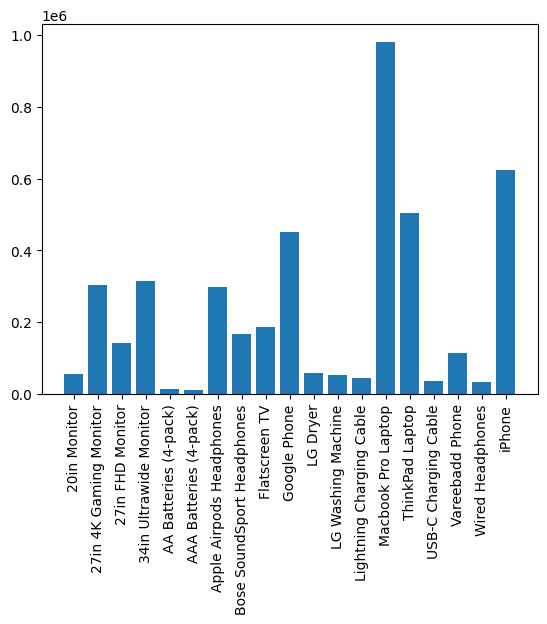

In [ ]:
plt.figure()
plt.bar(product_max.index,product_max['Sales'])
plt.xticks(rotation=90)
plt.show()

<Figure size 640x480 with 0 Axes>

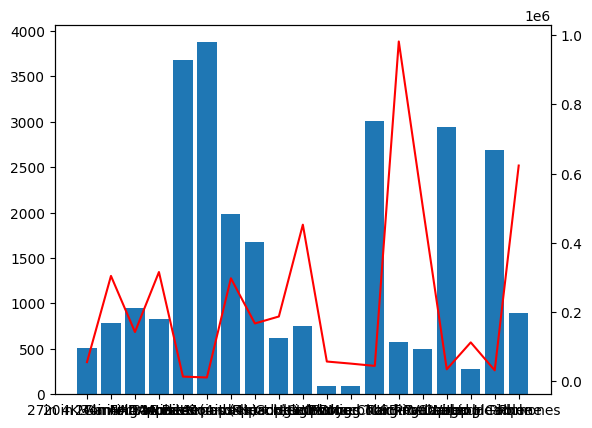

In [ ]:
plt.figure()
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(product_max.index,product_max['Quantity Ordered'])
plt.xticks(rotation=90)
ax2.plot(product_max.index,product_max['Sales'],color='r')
plt.show()

##É só o começo...